In [ ]:
import pandas as pd
from jqdatasdk import *
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [240]:
auth("18523900898","189Qwert")

In [241]:
date = '2020-09-30'
date = datetime.strptime(date, "%Y-%m-%d")
print(type(date))
all = get_all_securities(date=date)
all['date-s_date'] = date-all['start_date']
all['e_date-date'] = all['end_date']-date
c1 = all['date-s_date']>timedelta(days=30)
c2 = all['e_date-date']>timedelta(days=30)
all = all[c1 & c2]
# 过滤停牌股票
all = get_price(all.index.tolist(),end_date=date, count=1,fields=['open', 'close','low', 'high', 'paused',],panel=False)#'low', 'high','high_limit','low_limit',
all = all[all.paused==0]
cn1 = abs(all['open']-all['close'])<0.01
cn2 = all['close']>all['low']
cn3 = all['open']<all['high']
all = all[cn1 & cn2 & cn3]
codelist=[]
for code in all['code'].tolist():
    f1 = get_price(code,end_date=date, count=15,fields=['open', 'close','low','high'],panel=False) 
    f1['close-open'] = f1['close']-f1['open']
    #前3个都跌 and 中间不出现停牌
    if f1.iloc[-2,-1]<0 and f1.iloc[-3,-1]<0 and f1.iloc[-4,-1]<0 and len(f1[f1['close-open']==0])<4:
        # 初始close要小于当天的close
        if f1.iloc[0:5]['close'].min()<f1.iloc[-1]['close']:
            # 柱子越来越大
#             if f1.iloc[-2,-1]<=f1.iloc[-3,-1] and f1.iloc[-3,-1]<=f1.iloc[-4,-1]:
                # 最低价越来越小
#                 if f1.iloc[-4]['low']>=f1.iloc[-3]['low'] and f1.iloc[-3]['low']>=f1.iloc[-2]['low']:
                    # 最高价越来越大
            if f1.iloc[-4]['high']>=f1.iloc[-3]['high'] and f1.iloc[-3]['high']>=f1.iloc[-2]['high']:
                codelist.append(code)
# for code in all['code'].tolist():
# # #         f1 = get_price(code,end_date=i+timedelta(days=10), count=15,fields=['open', 'close'],panel=False) 
#     f1 = get_price(code,end_date=date, count=5,fields=['open', 'close'],panel=False) 
#     f1['close-open'] = f1['close']-f1['open']
#     #前3个都跌
#     if f1.iloc[-2,-1]<0 and f1.iloc[-3,-1]<0 and f1.iloc[-4,-1]<0:
#         codelist.append(code)
# #             f2 = get_price(code,end_date=i+timedelta(days=10), count=15,fields=['open', 'close','low', 'high','volume'],panel=False) 
# #             f2['close-open'] = f2['close']-f2['open']
print(codelist)

<class 'datetime.datetime'>


KeyboardInterrupt: 

In [5]:
codelist

['601778.XSHG',
 '002276.XSHE',
 '000902.XSHE',
 '300601.XSHE',
 '002992.XSHE',
 '300057.XSHE',
 '600209.XSHG']

In [6]:
if len(codelist)!=0:
    d = {'code': codelist}
    df = pd.DataFrame(d)
    df["time"]=date
df

,code,time
0,601778.XSHG,2020-09-30
1,002276.XSHE,2020-09-30
2,000902.XSHE,2020-09-30
3,300601.XSHE,2020-09-30
4,002992.XSHE,2020-09-30
5,300057.XSHE,2020-09-30
6,600209.XSHG,2020-09-30


In [11]:
import pandas as pd
import tushare as ts
import mplfinance as mpf
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [14]:
def drawing(code,start,end,time,name):
    df = ts.get_k_data(code,start,end)
    df.set_index('date',inplace=True)
    df.index = pd.DatetimeIndex(df.index)
#     print(df.head(5))
    df = df[['open','high','low','close','volume']]
    df.columns = ['Open','High','Low','Close','Volume']
    close = df.loc[time,'Close']
#     print(close)
    kwargs = dict(type='candle',volume=True,figratio=(19,8),figscale=0.85)
    mc = mpf.make_marketcolors(up = 'r',down = 'g')#00ff00
    my_style = mpf.make_mpf_style(marketcolors=mc)
    signal = [time,close]
    apd = mpf.make_addplot(signal,type='scatter')
    mpf.plot(df,**kwargs,style=my_style,title='Candle:'+str(time)+' | '+code+' | '+name, ylabel='price', ylabel_lower='date',vlines=dict(vlines=[time],linewidths=(1)))#, savefig='my_image.png'
#     mpf.plot(time,close,'o',color='r',markersize=10)
#     mpf.plot(df.index,figscale=0.7,fill_between=dict(y1=0,y2=close))
    
#     mpf.plot(daily,type='candle',vlines=dict(vlines=[time],linewidths=(1)))
#     mpf.plot(tdf,addplot=apd)
    plt.show() 

In [ ]:
for i in df.index:
    code = df.loc[i,'code'][:-5]
    time = df.loc[i,'time'].date()
#     time = datetime.strptime(time, "%Y-%m-%d").date()
    start = time-timedelta(days=90)
    start = datetime.strftime(start, "%Y-%m-%d")
    end = str(time)
#     end = time+timedelta(days=20)
#     end = datetime.strftime(end, "%Y-%m-%d")
    name = get_security_info(code).display_name
    print(code,time)
#     drawing(code,start,end,time,name)

### 收盘后的图形画图

In [101]:
import pandas as pd
from jqdatasdk import *
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import tushare as ts
import mplfinance as mpf

In [102]:
list=['000953.XSHE', '002259.XSHE', '002735.XSHE', '600080.XSHG']

In [103]:
if len(list)!=0:
    d = {'code': list}
    edf = pd.DataFrame(d)
    date = '2020-10-12'
    date = datetime.strptime(date, "%Y-%m-%d")# %HH:%MM:%SS
#     print(type(time))
    edf["time"]=date
edf

,code,time
0,000953.XSHE,2020-10-12
1,002259.XSHE,2020-10-12
2,002735.XSHE,2020-10-12
3,600080.XSHG,2020-10-12


In [104]:
def drawing(code,start,end,time):
    df = ts.get_k_data(code,start,end)
    print(df)
    df.set_index('date',inplace=True)
    df.index = pd.DatetimeIndex(df.index)
#     print(df.head(5))
    df = df[['open','high','low','close','volume']]
    df.columns = ['Open','High','Low','Close','Volume']

#     close = df.loc[time,'Close']
#     print(close)
    kwargs = dict(type='candle',volume=True,figratio=(19,8),figscale=0.85)
    mc = mpf.make_marketcolors(up = 'r',down = 'g')#00ff00
    my_style = mpf.make_mpf_style(marketcolors=mc)
    signal = [time,close]
    apd = mpf.make_addplot(signal,type='scatter')
    mpf.plot(df,**kwargs,style=my_style,title='Candle:'+str(time)+' | '+code, ylabel='price', ylabel_lower='date',vlines=dict(vlines=[time],linewidths=(1)))#, savefig='my_image.png'
#     mpf.plot(time,close,'o',color='r',markersize=10)
#     mpf.plot(df.index,figscale=0.7,fill_between=dict(y1=0,y2=close))
    
#     mpf.plot(daily,type='candle',vlines=dict(vlines=[time],linewidths=(1)))
#     mpf.plot(tdf,addplot=apd)
    plt.show() 

In [105]:

for i in edf.index:
    code = edf.loc[i,'code'][:-5]
    time = edf.loc[i,'time'].date()
#     time = datetime.strptime(time, "%Y-%m-%d").date()
    start = time-timedelta(days=90)
    start = datetime.strftime(start, "%Y-%m-%d")
    end = str(time)
    print(end)
#     end = time+timedelta(days=20)
#     end = datetime.strftime(end, "%Y-%m-%d")
#     name = get_security_info(code).display_name
    dn = ts.get_realtime_quotes(code)
    namel = dn.name[0]
    print(namel,code,time)
    drawing(code,start,end,time)

2020-10-12
*ST河化 000953 2020-10-12
           date  open  close  high   low   volume    code
126  2020-07-14  6.35   6.65  6.67  6.29  60627.0  000953
127  2020-07-15  6.66   6.32  6.69  6.32  52145.0  000953
128  2020-07-16  6.25   6.00  6.28  6.00  23715.0  000953
129  2020-07-17  5.85   5.85  5.95  5.70  46407.0  000953
130  2020-07-20  5.85   5.93  6.02  5.85  21089.0  000953
131  2020-07-21  5.98   5.92  6.01  5.91  14696.0  000953
132  2020-07-22  5.98   5.83  5.99  5.81  21206.0  000953
133  2020-07-23  5.88   5.73  5.88  5.54  26596.0  000953
134  2020-07-24  5.68   5.56  5.74  5.48  25182.0  000953
135  2020-07-27  5.59   5.69  5.69  5.58  10049.0  000953
136  2020-07-28  5.74   5.94  5.97  5.69  20676.0  000953
137  2020-07-29  5.86   5.91  5.95  5.81  12443.0  000953
138  2020-07-30  5.94   5.85  5.94  5.83  14121.0  000953
139  2020-07-31  5.90   5.83  5.90  5.68  16427.0  000953
140  2020-08-03  5.90   5.89  5.98  5.76  32607.0  000953
141  2020-08-04  5.89   5.82  5.90  5

NameError: name 'close' is not defined

In [112]:
df = ts.get_k_data('002259','2020-10-01')
df

,date,open,close,high,low,volume,code
183,2020-10-09,3.47,3.43,3.48,3.41,25254.0,002259
184,2020-10-12,3.42,3.28,3.44,3.26,113994.0,002259


### 收盘前的图形画图

In [117]:
import pandas as pd
from jqdatasdk import *
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import tushare as ts
import mplfinance as mpf

In [118]:
list=['000953.XSHE', '002259.XSHE', '002735.XSHE', '600080.XSHG']

In [119]:
if len(list)!=0:
    d = {'code': list}
    edf = pd.DataFrame(d)
    date = '2020-10-13'
    date = datetime.strptime(date, "%Y-%m-%d")
    edf["time"]=date
edf

,code,time
0,000953.XSHE,2020-10-13
1,002259.XSHE,2020-10-13
2,002735.XSHE,2020-10-13
3,600080.XSHG,2020-10-13


In [120]:
def drawing(code,start,end,time):
    try:
        df = ts.get_k_data(code,start,end)
        df = df[['date','open','high','low','close','volume']]
    except:
        print('历史数据没获取成功')
        return
    
    try:
        dn = ts.get_realtime_quotes(code) #Single stock symbol
    except:
        print('实时数据没获取成功')
        return
    name = dn.loc[0,'name']
    dn.loc[0,'code']=time
    dn.loc[0,'open']=float(dn.loc[0,'open'])
    dn.loc[0,'high']=float(dn.loc[0,'high'])
    dn.loc[0,'low']=float(dn.loc[0,'low'])
    dn.loc[0,'price']=float(dn.loc[0,'price'])
    dn.loc[0,'volume']=round(float(dn.loc[0,'volume'])/100,0)
    dn = dn[['code','name','open','high','low','price','volume']]
#     print(type(dn.volume[0]))
    dn.columns = ['date','name','open','high','low','close','volume']
    dn = dn[['date','open','high','low','close','volume']]
    df.columns = dn.columns
    df = pd.concat([df,dn],axis=0,ignore_index=True)
    df.set_index('date',inplace=True)
    df.index = pd.DatetimeIndex(df.index)
    df.columns = ['Open','High','Low','Close','Volume']
    df['Open'] = pd.Series(df['Open']).astype(float)
    df['High'] = pd.Series(df['High']).astype(float)
    df['Low'] = pd.Series(df['Low']).astype(float)
    df['Close'] = pd.Series(df['Close']).astype(float)
    df['Volume'] = pd.Series(df['Volume']).astype(float)
    print(df.tail(5))
    close = df.loc[time,'Close']
#     print(close)
    kwargs = dict(type='candle',volume=True,figratio=(19,8),figscale=0.85)
    mc = mpf.make_marketcolors(up = 'r',down = 'g')#00ff00
    my_style = mpf.make_mpf_style(marketcolors=mc)
    signal = [time,close]
    print('-----------------------')
    print(name+'  '+code)
    apd = mpf.make_addplot(signal,type='scatter')
    mpf.plot(df,**kwargs,style=my_style,title='Candle:'+str(time)+' | '+code, ylabel='price', ylabel_lower='date',vlines=dict(vlines=[time],linewidths=(1)))#, savefig='my_image.png'
#     mpf.plot(time,close,'o',color='r',markersize=10)
#     mpf.plot(df.index,figscale=0.7,fill_between=dict(y1=0,y2=close))
    
#     mpf.plot(daily,type='candle',vlines=dict(vlines=[time],linewidths=(1)))
#     mpf.plot(tdf,addplot=apd)
    plt.show() 

000953 2020-10-13
            Open  High   Low  Close   Volume
date                                        
2020-09-29  5.12  5.35  5.11   5.27  18331.0
2020-09-30  5.28  5.29  5.13   5.18  12919.0
2020-10-09  5.23  5.25  5.16   5.18   9490.0
2020-10-12  5.21  5.21  5.08   5.18  12850.0
2020-10-13  5.19  5.23  5.11   5.17   9218.0
-----------------------
*ST河化  000953


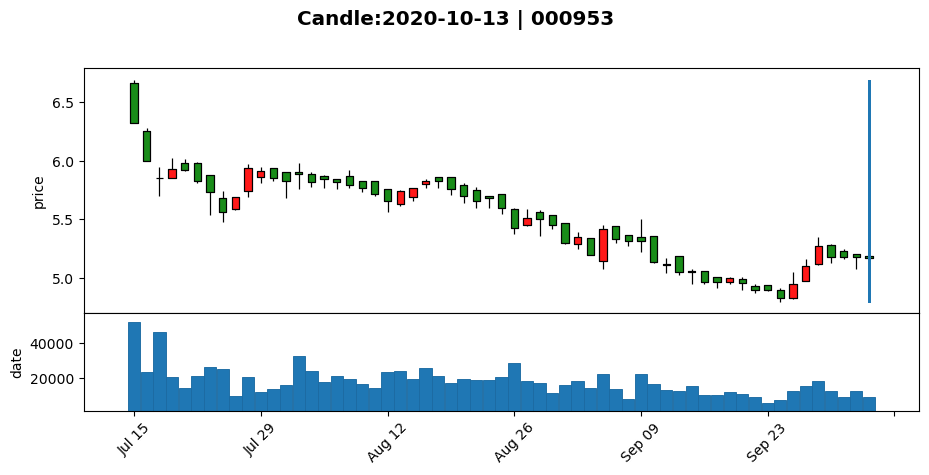

002259 2020-10-13
            Open  High   Low  Close    Volume
date                                         
2020-09-29  3.45  3.50  3.41   3.47   29364.0
2020-09-30  3.58  3.58  3.39   3.43   28937.0
2020-10-09  3.47  3.48  3.41   3.43   25254.0
2020-10-12  3.42  3.44  3.26   3.28  113994.0
2020-10-13  3.30  3.32  3.23   3.28   24362.0
-----------------------
*ST升达  002259


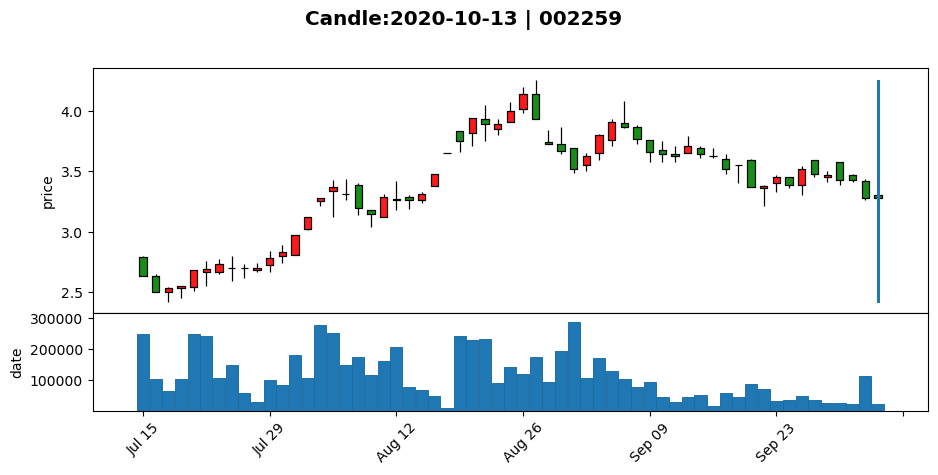

002735 2020-10-13
             Open   High    Low  Close   Volume
date                                           
2020-09-29  39.50  39.99  38.63  39.64  12193.0
2020-09-30  40.08  40.08  38.65  39.60  12587.0
2020-10-09  39.61  40.23  38.05  38.21  24405.0
2020-10-12  39.00  39.98  37.80  38.29  26389.0
2020-10-13  38.30  38.68  37.60  38.44   8401.0
-----------------------
王子新材  002735


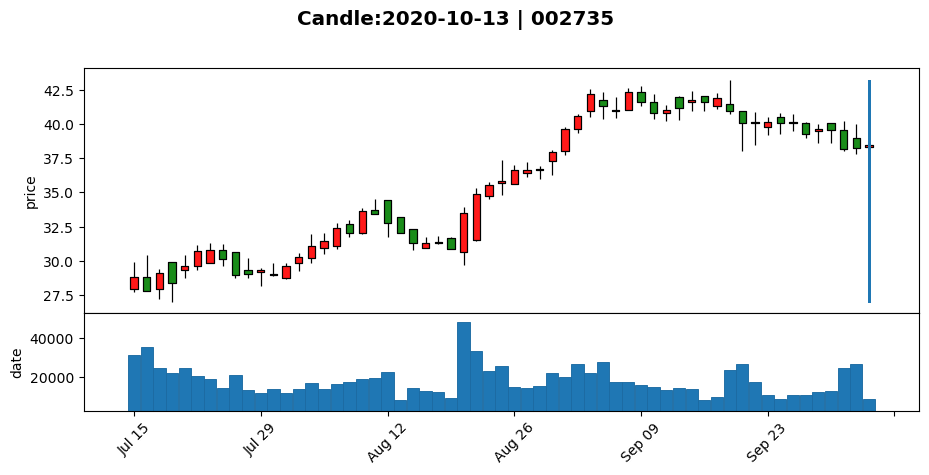

600080 2020-10-13
            Open  High   Low  Close   Volume
date                                        
2020-09-29  6.46  6.56  6.32   6.48  37232.0
2020-09-30  6.49  6.52  6.40   6.41   9892.0
2020-10-09  6.43  6.49  6.36   6.36  17234.0
2020-10-12  6.31  6.35  6.04   6.05  85217.0
2020-10-13  6.03  6.05  5.93   5.99  39435.0
-----------------------
ST金花  600080


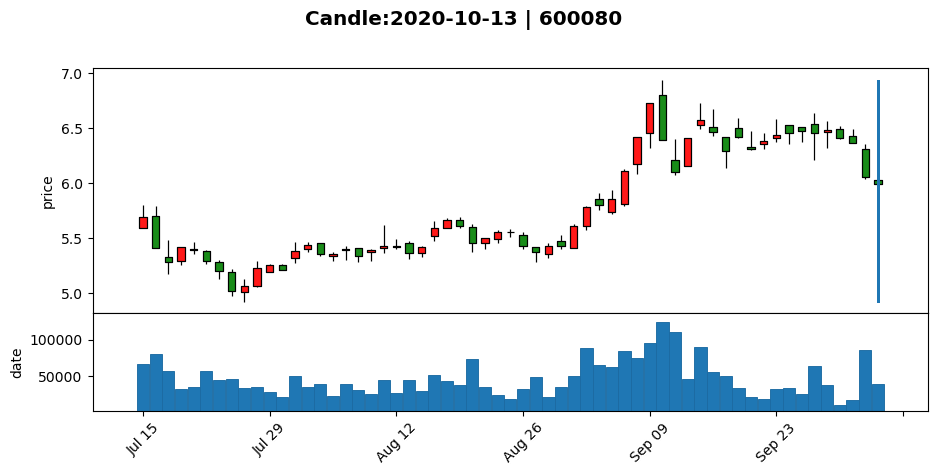

In [121]:
for i in edf.index:
    code = edf.loc[i,'code'][:-5]
    time = edf.loc[i,'time'].date()
#     time = datetime.strptime(time, "%Y-%m-%d").date()
    start = time-timedelta(days=90)
    start = datetime.strftime(start, "%Y-%m-%d")
    end = str(time)
#     end = time+timedelta(days=20)
#     end = datetime.strftime(end, "%Y-%m-%d")
#     name = get_security_info(code).display_name
    print(code,time)
    drawing(code,start,end,time)

In [ ]:
import tushare as ts

df = ts.get_realtime_quotes('000902') #Single stock symbol
df = df[['code','name','open','high','low','price','volume']]
df.index = '2020-10-09'
name = df.name[0]
code = df.code[0]
df.columns = ['Open','High','Low','Close','Volume']
df,name
# df[['code','name','price','bid','ask','volume','amount','time']]

In [110]:
lst = ['000002.XSHE', '000546.XSHE', '001979.XSHE', '002085.XSHE', '002269.XSHE', '002314.XSHE', '300316.XSHE', '600651.XSHG','000002.XSHE', '000546.XSHE', '000796.XSHE', '001979.XSHE', '002085.XSHE', '002727.XSHE', '300316.XSHE', '600651.XSHG']
s = set(lst)
s

{'000002.XSHE',
 '000546.XSHE',
 '000796.XSHE',
 '001979.XSHE',
 '002085.XSHE',
 '002269.XSHE',
 '002314.XSHE',
 '002727.XSHE',
 '300316.XSHE',
 '600651.XSHG'}

In [ ]:
['000002.XSHE',
 '000546.XSHE',
 '000796.XSHE',
 '001979.XSHE',
 '002085.XSHE',
 '002269.XSHE',
 '002314.XSHE',
 '002727.XSHE',
 '300316.XSHE',
 '600651.XSHG']